In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from scipy.stats import kurtosis
from glob import glob
import os
import matplotlib
import matplotlib.patches as patches

matplotlib.rcParams.update({'errorbar.capsize': 4})
jtplot.style('grade3', context='talk', grid=False, ticks=True, fscale=1.5)


In [3]:
path = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/code/imag_analisis/focustest/focustest_100um/Im_pos*.tif'
files = glob(path)
files.sort()
files


['/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/code/imag_analisis/focustest/focustest_100um/Im_pos0.tif',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/code/imag_analisis/focustest/focustest_100um/Im_pos1.tif',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/code/imag_analisis/focustest/focustest_100um/Im_pos2.tif',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/code/imag_analisis/focustest/focustest_100um/Im_pos3.tif',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/code/imag_analisis/focustest/focustest_100um/Im_pos4.tif',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/code/imag_analisis/focustest/focustest_100um/Im_pos5.tif',
 '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mai

In [4]:
# fig, ax = plt.subplots(len(files), figsize=(10, 10*len(files)))

totint = []
avgint = []
kurt = []
for i in range(len(files)):
    img = io.imread(files[i]).astype(np.int64)
    k = kurtosis(img.flatten(), fisher=True, bias=False )
    avgim = np.average(img)
    avgint.append(avgim)
    kurt.append(k)#/avgim)
    # ax[i].imshow(img, clim=(100, 500))
    totint.append(img.sum())
    # plt.colorbar(img)

[Text(0.5, 0, 'Step (100 µm)'), Text(0, 0.5, 'Average int. (arb. units)')]

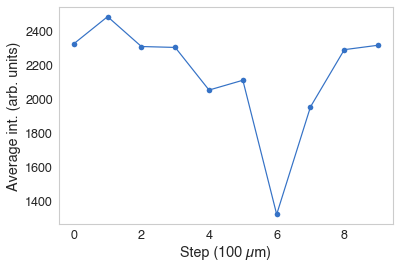

In [6]:
# plt.plot(avgint, 'ro-', label='Average int.')
plt.plot(kurt, 'bo-', label='Metric')

plt.gca().set(xlabel = 'Step (100 µm)', ylabel= 'Average int. (arb. units)')

In [10]:
np.argmin(kurt)

6

# White light, new holder NA 0.95

In [11]:
# fig, ax = plt.subplots(len(files), figsize=(10, 10*len(files)))
path = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/code/imag_analisis/focustest/0.01mm, whitelight_attempt1/Im_pos*.tif'
files = glob(path)
files.sort()

totint = []
avgint = []
kurt = []
for i in range(len(files)):
    img = io.imread(files[i]).astype(np.int64)
    k = kurtosis(img.flatten(), fisher=True, bias=False )
    avgim = np.average(img)
    avgint.append(avgim)
    kurt.append(k)#/avgim)
    totint.append(img.sum())

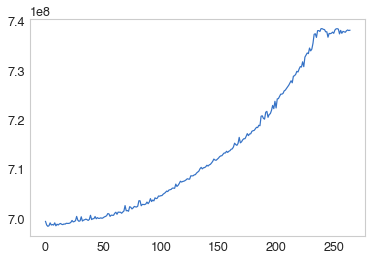

In [12]:
plt.plot(totint)

In [4]:
noise = np.random.normal(size=int(1e4))
noise=pd.DataFrame(noise)
first_derivative=noise.diff(periods=40)

In [9]:
noise.shape, first_derivative.shape

((10000, 1), (10000, 1))

# Extract features in image

In [65]:
from scipy.ndimage import median_filter

In [13]:
from sklearn.decomposition import NMF

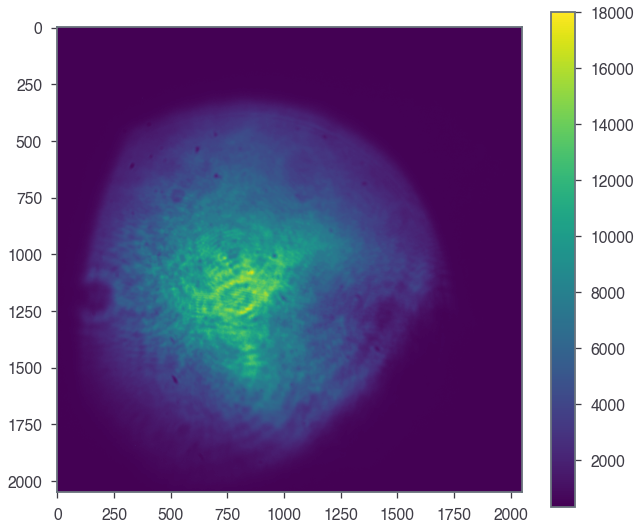

In [ ]:
path = '/Users/pabloherrero/Library/CloudStorage/GoogleDrive-qmlab@mail.huji.ac.il/My Drive/Ba Tagging/data/img/sets/07-10-24/Rhodamine-B 50 µM/1/Center-561nm_Width-21nm_14-51-42.tif'

files = glob(path+'/*.tif')
files.sort()
# for n,f in enumerate(files):
    # img = io.imread(f).astype(np.int64)
img = io.imread(path).astype(np.int64)

imgb = median_filter(img, size=2)
plt.imshow(imgb,)# clim=(100, 2e4))
plt.colorbar()


In [92]:
model = NMF(n_components=20)
features = model.fit_transform(imgb)

In [95]:
def show_as_image(sample):
    bitmap = sample.reshape((2048, 2048))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

ValueError: cannot reshape array of size 20 into shape (2048,2048)

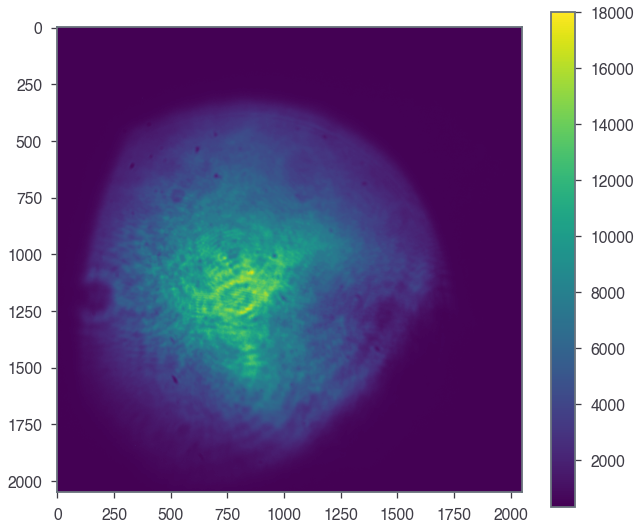

In [96]:
plt.imshow(imgb,)# clim=(100, 2e4))
plt.colorbar()

for f in features:
    show_as_image(f)